**Author: Fitria Dwi Wulandari (wulan391@sci.ui.ac.id) - December 22, 2020.**

# Business Decision Research

**Goal:** Processing the store's transaction data from 2013 to 2019.

### Data Loading

In [2]:
# Import library
import pandas as pd

In [4]:
# Import dataset
retail_data = pd.read_csv("data_retail.csv", sep=';')
print("Dataset size: %d columns dan %d rows.\n" % retail_data.shape)
retail_data.head()

Dataset size: 100000 columns dan 8 rows.



,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


### Data Cleansing

#### Variables and Data Types

In [5]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


The two variables that indicate the transactions (`First_Transaction` and `Last_Transaction`) aren't datetime type, therefore both variables will be corrected.

In [6]:
# First_Transaction column
retail_data['First_Transaction'] = pd.to_datetime(retail_data['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Last_Transaction column
retail_data['Last_Transaction'] = pd.to_datetime(retail_data['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [8]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


#### Removing a Variable(s)

In [9]:
retail_data.columns

Index(['no', 'Row_Num', 'Customer_ID', 'Product', 'First_Transaction',
       'Last_Transaction', 'Average_Transaction_Amount', 'Count_Transaction'],
      dtype='object')

In [10]:
# Drop unnecessary columns
retail_data.drop("no", axis=1, inplace=True)
retail_data.drop("Row_Num", axis=1, inplace=True)

In [11]:
retail_data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


#### Handling Duplicate Data

In [15]:
print("Dataset size: %d columns dan %d rows.\n" % retail_data.shape)
print('The number of duplicate data is', retail_data.duplicated().sum())

Dataset size: 99931 columns dan 6 rows.

The number of duplicate data is 0


In [13]:
# Delete entries that have duplicate data
retail_data.drop_duplicates(inplace=True)
print("Dataset size: %d columns dan %d rows.\n" % retail_data.shape)

Dataset size: 99931 columns dan 6 rows.



#### Handling Missing Value

In [18]:
print('Missing values status:',retail_data.isnull().values.any())
print('\nThe number of missing values for each columns:')
print(retail_data.isnull().sum().sort_values(ascending=False))

Missing values status: False

The number of missing values for each columns:
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64


### Defines Churn Custumers

A customer is no longer referred to as a customer (churn) when no longer transacting to the shop until the last 6 months from the last available data update.

In [19]:
# Check the last transaction in the dataset
print('Last Transaction')
print(max(retail_data['Last_Transaction']))

Last Transaction
2019-02-01 23:57:57.286000128


In [20]:
# Classify customers who are churn or not churn
retail_data.loc[retail_data['Last_Transaction']<='2018-08-01', 'is_churn'] = True
retail_data.loc[retail_data['Last_Transaction']>'2018-08-01', 'is_churn'] = False

### Data Visualization

In [21]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Create a New Column that Contains The Year of The Datetime of First_Transaction and Last_Transaction

# Year column of first transaction
retail_data['Year_First_Transaction'] = retail_data['First_Transaction'].dt.year
# Year column of last transaction
retail_data['Year_Last_Transaction'] = retail_data['Last_Transaction'].dt.year

#### Customer Acquisition by Year

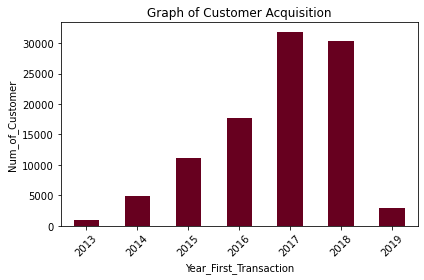

In [23]:
retail_data_year = retail_data.groupby(['Year_First_Transaction'])['Customer_ID'].count()
retail_data_year.plot(x='Year_First_Transaction', y='Customer_ID', kind= 'bar', title='Graph of Customer Acquisition', cmap='RdGy')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Transaction by Year

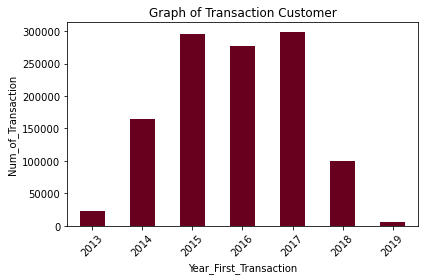

In [24]:
plt.clf()
retail_data_year = retail_data.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
retail_data_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer', cmap='RdGy')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Average Transaction Amount by Year

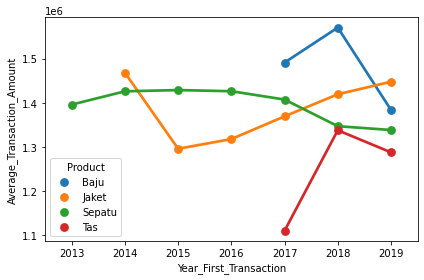

In [25]:
plt.clf()
sns.pointplot(data = retail_data.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

#### The Proportion of Churn Customers for Each Product

<Figure size 432x288 with 0 Axes>

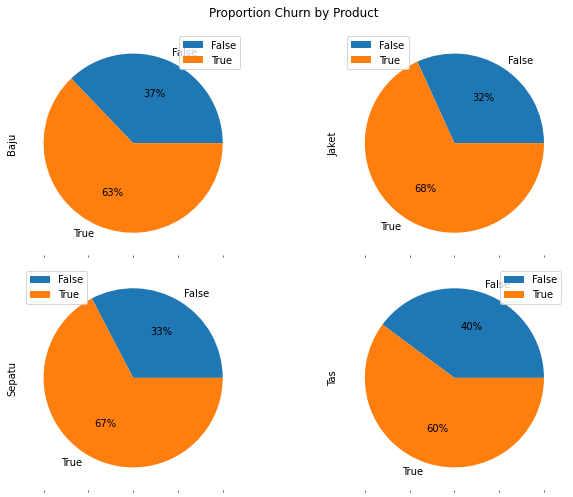

In [26]:
plt.clf()

# pivot data
retail_data_piv = retail_data.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# proportion churn by product
plot_product = retail_data_piv.count().sort_values(ascending=False).head(5).index

# pie chart
retail_data_piv = retail_data_piv.reindex(columns=plot_product)
retail_data_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

#### Customer Distribution by Count Transaction Group

This categorization is done by grouping the number of transactions, as shown by the following table:

| Transaction Amount Range | Category | 
| :---: | :---: | 
| 0 - 1 | 1 | 
| 2 - 3 | 2 | 	
| 4 - 6 | 3 | 
| 7 - 10 | 4 |
| > 10 | 5|

In [27]:
plt.clf()

# Count transaction group
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4'
    else:
        val ='5'
    return val

<Figure size 432x288 with 0 Axes>

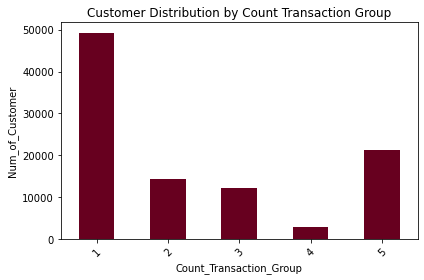

In [28]:
retail_data['Count_Transaction_Group'] = retail_data.apply(func, axis=1)
retail_data_year = retail_data.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
retail_data_year. plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group', cmap='RdGy')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Customer Distribution by Average Transaction Amount Group

This categorization is done by grouping the average transaction amount, as shown by the following table:

| Average Transaction Amount Range | Category | 
| :---: | :---: | 
| 100000 - 200000 | 1 | 
| > 200000 - 500000 | 2 | 	
| > 500000 - 750000 | 3 | 
| > 750000 - 1000000 | 4 |
| > 1000000 - 2500000 | 5|
| > 2500000 - 5000000 | 6|
| > 5000000 - 10000000 | 7|
| > 10000000 | 8|

In [29]:
plt.clf()

# average transaction amount group
def f(row):
 if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
  val ='1'
 elif (row['Average_Transaction_Amount'] >200000 and row['Average_Transaction_Amount'] <= 500000):
  val ='2'
 elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
  val ='3'
 elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
  val ='4'
 elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
  val ='5'
 elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
  val ='6'
 elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
  val ='7'
 else:
  val ='8'
 return val

<Figure size 432x288 with 0 Axes>

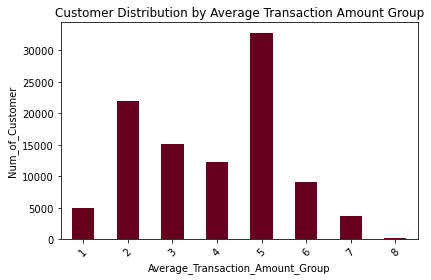

In [30]:
retail_data['Average_Transaction_Amount_Group'] = retail_data.apply(f, axis=1)
retail_data_year = retail_data.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
retail_data_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group', cmap='RdGy')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Building a Model

In [31]:
# Import libraries
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Create a feature column: Year_Diff
retail_data['Year_Diff'] = retail_data['Year_Last_Transaction'] - retail_data['Year_First_Transaction']

# Defines feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = retail_data[feature_columns]

# Target variable
y = retail_data['is_churn']
y = y.astype('int')

#### Data Splitting

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Modelling

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [37]:
# Initiate the logreg model
logreg = LogisticRegression()

In [38]:
# Fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

In [39]:
# Model evaluation
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8265]
 [    2 16715]]


#### Confusion Matrix Visualization

<Figure size 432x288 with 0 Axes>

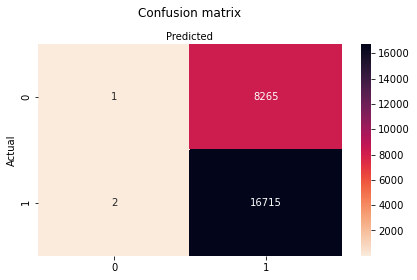

In [49]:
plt.clf()

# Name of classes
class_names = [0, 1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='rocket_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

There is 16715 true positive, 1 true negative, 8265 false positive, and 2 false negative.

**Note:**
- True positive is when you predicted positive and it’s true.
- True negative is when you predicted negative and it’s true.
- False positive is when you predicted positive and it’s false.
- False negative is when you predicted negative and it’s false.

#### Accuracy, Precision, and Recall

In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Calculating accuracy, precision, and recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.6690949845895209
Precision: 0.6690949845895209
Recall   : 0.6690949845895209


**Note:**
- Recall : out of all the positive classes, how much we predicted correctly. It should be high as possible.
- Precision : out of all the positive classes we have predicted correctly, how many are actually positive.
- Accuracy : out of all the classes, how much we predicted correctly. It should be high as possible.